In [ ]:
class VideoCache:
  def __init__(self):
    self.cache = {"perrito":"video de un perrito corriendo"}
  def get_video(self, video_id):
    if video_id in self.cache: # verificación de si el video se encuentra en el caché
      print(f"Video {video_id} retrieved from cache")
      print(self.cache) # imprimimos el diccionario de nuestro caché para confimara que se encuentre la información del video dentro
      return self.cache[video_id]
    else:
      print(f"Video {video_id} not in cache, downloading...") # se simula la descarga del video una vez no encontrado en nuestro caché
      video_data = self.download_video(video_id)
      self.cache[video_id] = video_data
      grafo = {
    '192.168.1.1': {'or': 11},
    '192.168.2.1': {'or': 3},
    '192.168.3.1': {'or': 7},
    'or':   {'192.168.1.1':11,'192.168.2.1':3,'192.168.3.1':7}
    }
      anycast = AnycastService()
      s, distancia, previos = anycast.dijkstra(grafo,"or")
      print(f"Se ha recibido el mensaje de {s[1]}")


      return video_data

  def download_video(self, video_id):

    return f"Video data for {video_id}"

In [ ]:
# Ejemplo de uso
#con el caché vacío
cache = VideoCache()
video = cache.get_video("video1234")
print(video)

Video video1234 not in cache, downloading...
Se ha recibido el mensaje de 192.168.2.1
Video data for video1234


In [ ]:
video = cache.get_video("video1234") # en esta línea, volvemos a solicitar el video, pero
                                     #esta vez, ya se encuentra guardado en el caché, por lo que se obtiene directamente de ahí

Video video1234 retrieved from cache
{'perrito': 'video de un perrito corriendo', 'video1234': 'Video data for video1234'}


In [ ]:
cache = VideoCache()
video = cache.get_video("perrito")
print(video)

Video perrito retrieved from cache
{'perrito': 'video de un perrito corriendo'}
video de un perrito corriendo


Nearest server for user is 192.168.2.1


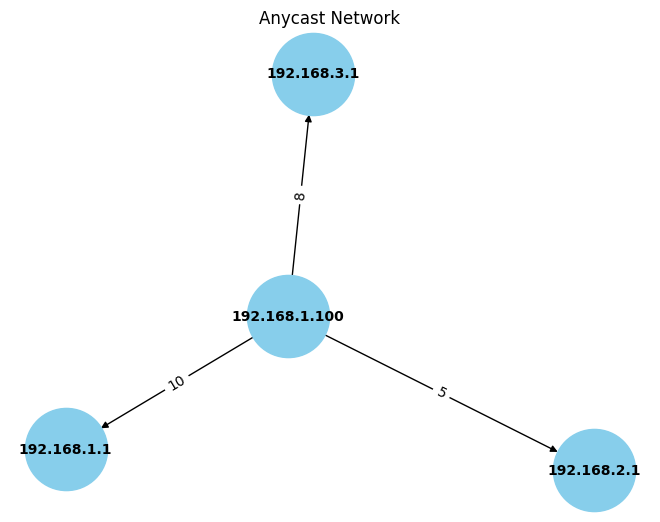

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

class AnycastService:
  def __init__(self):
    self.servers = ['192.168.1.1', '192.168.2.1', '192.168.3.1']
    # Inicializamos la matriz de distancias desde "192.168.1.100" a los servidores
    self.distances = {}
    self.distances["192.168.1.100"] = {}
    for server in self.servers:
      distance = random.randint(1, 10)
      self.distances["192.168.1.100"][server] = distance

  def getNearestServer(self, userIP):
    minDistance = float('inf')
    nearestServer = None

    # Iteramos sobre los servidores para encontrar el más cercano
    for server in self.servers:
      distance = self.distances[userIP].get(server, float('inf'))
      if distance < minDistance:
        minDistance = distance
        nearestServer = server
    return nearestServer

  def drawNetwork(self):
    G = nx.DiGraph()

    # Agregamos nodos
    G.add_nodes_from(self.servers)
    G.add_node("192.168.1.100")

    # Agregamos distancias
    for server, distance in self.distances["192.168.1.100"].items():
      G.add_edge("192.168.1.100", server, weight=distance)

    # Dibujamos el grafo
    pos = nx.spring_layout(G) # Podemos usar diferentes grafos: circular_layout, random_layout, shell_layout
    nx.draw(G, pos, with_labels=True, node_size=3500, node_color="skyblue", font_size=10, font_weight="bold")
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Anycast Network")
    plt.show()

anycast = AnycastService()
nearestServer = anycast.getNearestServer("192.168.1.100")
print(f"Nearest server for user is {nearestServer}")
anycast.drawNetwork()